# **Model Optimization and Performance Measure (VTune)**

Deep learning model optimization refers to the process of improving the performance, efficiency, and general characteristics of a deep learning model. Optimization is crucial for ensuring that the model performs well, uses computational resources efficiently, and problem specific requirements.

Furthermore, since deep learning models are used in web applications, mobile devices, and edge devices, we want to compress the models without reducing the quality of the original models.


# **Why models should be optimized?**

There are several main ways model optimization can help with application development.

## **Size reduction**

Some forms of optimization can be used to reduce the size of a model. Smaller models have the following benefits:

- Smaller storage size
- Smaller download size
- Less memory usage

Quantization can reduce the size of a model in all of these cases, potentially at the expense of some accuracy. Pruning and clustering can reduce the size of a model for download by making it more easily compressible.

## **Latency reduction**

Latency is the amount of time it takes to run a single inference with a given model. Some forms of optimization can reduce the amount of computation required to run inference using a model, resulting in lower latency. Latency can also have an impact on power consumption.

Currently, quantization can be used to reduce latency by simplifying the calculations that occur during inference, potentially at the expense of some accuracy.

# **Type of optimization methods**

## **Quantization**

Quantization works by reducing the precision of the numbers used to represent a model's parameters, which by default are 32-bit floating point numbers. This results in a smaller model size and faster computation.

## **Pruning**

Pruning works by removing parameters within a model that have only a minor impact on its predictions. Pruned models are the same size on disk, and have the same runtime latency, but can be compressed more effectively. This makes pruning a useful technique for reducing model download size.


## **Clustering**

Clustering works by grouping the weights of each layer in a model into a predefined number of clusters, then sharing the centroid values for the weights belonging to each individual cluster. This reduces the number of unique weight values in a model, thus reducing its complexity.

### ***The main purpose of this technique is to minimise size and boost computing speed.***







# **Papers**

1. To prune, or not to prune: exploring the efficacy of
pruning for model compression: [link](https://arxiv.org/pdf/1710.01878.pdf)

2. Quantization and Training of Neural Networks for Efficient
Integer-Arithmetic-Only Inference:[link](https://arxiv.org/pdf/1712.05877.pdf)

3. DEEP COMPRESSION: COMPRESSING DEEP NEURAL
NETWORKS WITH PRUNING, TRAINED QUANTIZATION
AND HUFFMAN CODING: [link](https://arxiv.org/pdf/1510.00149.pdf)

4. CNN-Based Recognition of Handwritten Digits in MNIST
Database: [link](https://users.cecs.anu.edu.au/~Tom.Gedeon/conf/ABCs2018/paper/ABCs2018_paper_104.pdf)

# **Framework**

1. Tensorflow
2. Opencv


# **Our approaches**

## **1. Mnist handwritten Dataset and develop baseline model**
## **2. Model Optimization**
## **- Method1: Based on three papers, Model optimization method used to compress the model**
## **- Method 2: Optimization using Openvino**
## **3. Performance Analysis (CPU,GPU)**
## **- Ananlysis the performance using VTune**

# **1. Mnist handwritten Dataset and develop baseline model**

In [ ]:
# install necessary library
%%time
! pip install -q tensorflow-model-optimization tensorflow opencv-python pandas numpy matplotlib

CPU times: user 43.1 ms, sys: 4.68 ms, total: 47.7 ms
Wall time: 5.92 s


In [ ]:
# import necessary library
%%time

import tensorflow as tf
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

import tempfile
import zipfile
import os


CPU times: user 21 µs, sys: 1 µs, total: 22 µs
Wall time: 24.6 µs


In [ ]:
if tf.config.experimental.list_physical_devices('GPU'):
    print("GPU available. Using GPU.")
    # Set GPU memory growth to avoid allocating all memory at once
    for gpu in tf.config.experimental.list_physical_devices('GPU'):
        tf.config.experimental.set_memory_growth(gpu, True)
else:
    print("No GPU available. Using CPU.")

## **Baseline Model developement using MNIST Handwritten dataset (Classification problem)**

In [ ]:
%%time
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#print size of the dataset

print(f"Training images: {train_images.shape},Training labels: {train_labels.shape}, Test_images: {test_images.shape},Test_labels: {test_labels.shape}")
print("#"*100)

# Normalize the input image so that each pixel value is between 0 to 1.
train_images = train_images / 255.0
test_images  = test_images / 255.0

model = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape=(28, 28)),
  tf.keras.layers.Reshape(target_shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(filters=12, kernel_size=(3, 3),
                         activation=tf.nn.relu),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10)
])

print(model.summary())
print("#"*100)
# Train the digit classification model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(
    train_images,
    train_labels,
    validation_split=0.1,
    epochs=10
)
model.save("baseline_model.h5")


Training images: (60000, 28, 28),Training labels: (60000,), Test_images: (10000, 28, 28),Test_labels: (10000,)
####################################################################################################
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_5 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 12)        120       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 12)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 2028)              0         
                                                                 
 dense_5 (Dense)             (None, 10) 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **baseline model store and evaluation**

In [ ]:
%%time
_, baseline_model_accuracy = model.evaluate(
    test_images, test_labels, verbose=0)

print('Baseline test accuracy:', baseline_model_accuracy)

print("#"*100)

_, keras_file = tempfile.mkstemp('.h5')
print('Saving model to: ', keras_file)
tf.keras.models.save_model(model, keras_file, include_optimizer=False)

Baseline test accuracy: 0.9793000221252441
####################################################################################################
Saving model to:  /tmp/tmp8a0fcqum.h5
CPU times: user 772 ms, sys: 114 ms, total: 885 ms
Wall time: 948 ms


<timed exec>:10: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


## **Observation**

1. Baseline model test accuracy: 97%

# **2. Model Optimization**

# **2.1. Method1: Based on three papers, Model optimization method used to compress the model**

## **Prune and fine tune the model to 50% sparsity**

In [ ]:
%%time
import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.ConstantSparsity(0.5, begin_step=0, frequency=100)
  }

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep()
]

pruned_model = prune_low_magnitude(model, **pruning_params)

# Use smaller learning rate for fine-tuning
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)

pruned_model.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer=opt,
  metrics=['accuracy'])

print(pruned_model.summary())
print("#"*100)

# Fine-tune model
pruned_model.fit(
  train_images,
  train_labels,
  epochs=3,
  validation_split=0.1,
  callbacks=callbacks)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_reshap  (None, 28, 28, 1)         1         
 e_4 (PruneLowMagnitude)                                         
                                                                 
 prune_low_magnitude_conv2d  (None, 26, 26, 12)        230       
 _4 (PruneLowMagnitude)                                          
                                                                 
 prune_low_magnitude_max_po  (None, 13, 13, 12)        1         
 oling2d_4 (PruneLowMagnitu                                      
 de)                                                             
                                                                 
 prune_low_magnitude_flatte  (None, 2028)              1         
 n_4 (PruneLowMagnitude)                                         
                                                      

In [ ]:
# @title
#Define helper functions to calculate and print the sparsity of the model.


def print_model_weights_sparsity(model):

    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.Wrapper):
            weights = layer.trainable_weights
        else:
            weights = layer.weights
        for weight in weights:
            if "kernel" not in weight.name or "centroid" in weight.name:
                continue
            weight_size = weight.numpy().size
            zero_num = np.count_nonzero(weight == 0)
            print(
                f"{weight.name}: {zero_num/weight_size:.2%} sparsity ",
                f"({zero_num}/{weight_size})",
            )

In [ ]:
%%time
#check prunning percentage of baseline model
stripped_pruned_model = tfmot.sparsity.keras.strip_pruning(pruned_model)

print_model_weights_sparsity(stripped_pruned_model)

stripped_pruned_model_copy = tf.keras.models.clone_model(stripped_pruned_model)
stripped_pruned_model_copy.set_weights(stripped_pruned_model.get_weights())

conv2d_4/kernel:0: 50.00% sparsity  (54/108)
dense_4/kernel:0: 50.00% sparsity  (10140/20280)


### **Observation**

Pruning and 50% sparsity are done

## **Apply clustering and sparsity preserving clustering and check its effect on model sparsity in both cases**

In [ ]:
%%time
# Clustering
cluster_weights = tfmot.clustering.keras.cluster_weights
CentroidInitialization = tfmot.clustering.keras.CentroidInitialization

clustering_params = {
  'number_of_clusters': 8,
  'cluster_centroids_init': CentroidInitialization.KMEANS_PLUS_PLUS
}

clustered_model = cluster_weights(stripped_pruned_model, **clustering_params)

clustered_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print('Train clustering model:')
clustered_model.fit(train_images, train_labels,epochs=10, validation_split=0.1)


stripped_pruned_model.save("stripped_pruned_model_clustered.h5")


Train clustering model:
Epoch 1/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0392 - accuracy: 0.9879 - val_loss: 0.0771 - val_accuracy: 0.9782
Epoch 2/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0412 - accuracy: 0.9868 - val_loss: 0.0789 - val_accuracy: 0.9792
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0397 - accuracy: 0.9868 - val_loss: 0.0716 - val_accuracy: 0.9812
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0406 - accuracy: 0.9869 - val_loss: 0.0667 - val_accuracy: 0.9833
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0397 - accuracy: 0.9873 - val_loss: 0.0660 - val_accuracy: 0.9840
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0368 - accuracy: 0.9878 - val_loss: 0.0668 - val_accuracy: 0.9832
Epoch 7/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0352 - accuracy: 0.9884 - val_lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
%%time
# Sparsity preserving clustering
from tensorflow_model_optimization.python.core.clustering.keras.experimental import (
    cluster,
)

cluster_weights = cluster.cluster_weights

clustering_params = {
  'number_of_clusters': 8,
  'cluster_centroids_init': CentroidInitialization.KMEANS_PLUS_PLUS,
  'preserve_sparsity': True
}

sparsity_clustered_model = cluster_weights(stripped_pruned_model_copy, **clustering_params)

sparsity_clustered_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print('Train sparsity preserving clustering model:')
sparsity_clustered_model.fit(train_images, train_labels,epochs=10, validation_split=0.1)

Train sparsity preserving clustering model:
Epoch 1/10
1688/1688 [==============================] - 10s 5ms/step - loss: 0.0400 - accuracy: 0.9874 - val_loss: 0.0598 - val_accuracy: 0.9857
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0402 - accuracy: 0.9869 - val_loss: 0.0574 - val_accuracy: 0.9840
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0382 - accuracy: 0.9878 - val_loss: 0.0681 - val_accuracy: 0.9822
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0385 - accuracy: 0.9873 - val_loss: 0.0660 - val_accuracy: 0.9815
Epoch 5/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0387 - accuracy: 0.9875 - val_loss: 0.0664 - val_accuracy: 0.9827
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0366 - accuracy: 0.9876 - val_loss: 0.0671 - val_accuracy: 0.9838
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0372 - accur

In [ ]:
%%time
#check sparsity
print("Clustered Model sparsity:\n")
print_model_weights_sparsity(clustered_model)
print("\nSparsity preserved clustered Model sparsity:\n")
print_model_weights_sparsity(sparsity_clustered_model)

Clustered Model sparsity:

conv2d_4/kernel:0: 0.00% sparsity  (0/108)
dense_4/kernel:0: 3.73% sparsity  (756/20280)

Sparsity preserved clustered Model sparsity:

conv2d_4/kernel:0: 50.00% sparsity  (54/108)
dense_4/kernel:0: 50.00% sparsity  (10140/20280)


In [ ]:
# @title
%%time
def get_gzipped_model_size(file):
  # It returns the size of the gzipped model in kilobytes.

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)/1000

## **Comparison of model sizes**

In [ ]:
%%time
# Clustered model
clustered_model_file = 'clustered_model.h5'

# Save the model.
clustered_model.save(clustered_model_file)

#Sparsity Preserve Clustered model
sparsity_clustered_model_file = 'sparsity_clustered_model.h5'

# Save the model.
sparsity_clustered_model.save(sparsity_clustered_model_file)

base_model_file = 'base_model.h5'
model.save(base_model_file)


Base Model size:  234.185  KB
Clustered Model size:  230.202  KB
Sparsity preserved clustered Model size:  142.912  KB
CPU times: user 95.4 ms, sys: 6.09 ms, total: 101 ms
Wall time: 101 ms


## **Create a TFLite model from combining sparsity preserving weight clustering and post-training quantization**

In [ ]:
%%time
stripped_sparsity_clustered_model = tfmot.clustering.keras.strip_clustering(sparsity_clustered_model)

converter = tf.lite.TFLiteConverter.from_keras_model(stripped_sparsity_clustered_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
sparsity_clustered_quant_model = converter.convert()

_, pruned_and_clustered_tflite_file = tempfile.mkstemp('.tflite')

with open(pruned_and_clustered_tflite_file, 'wb') as f:
  f.write(sparsity_clustered_quant_model)


In [ ]:
%%time
print("Base Model size: ", get_gzipped_model_size(base_model_file), ' KB')
print("Clustered Model size: ", get_gzipped_model_size(clustered_model_file), ' KB')
print("Sparsity preserved clustered Model size: ", get_gzipped_model_size(sparsity_clustered_model_file), ' KB')
print("Sparsity preserved clustered and quantized TFLite model size:",
       get_gzipped_model_size(pruned_and_clustered_tflite_file), ' KB')

Base Model size:  234.185  KB
Clustered Model size:  230.202  KB
Sparsity preserved clustered Model size:  142.912  KB
Sparsity preserved clustered and quantized TFLite model size: 7.621  KB


### **Observation**

Finally Model is optimized using collbrative method(sparsity,prunning, quantization)

- Base Model size:  234.185  KB
- Clustered Model size:  230.202  KB
- Sparsity preserved clustered Model size:  142.912  KB
- Sparsity preserved clustered and quantized TFLite model size: 7.621  KB

In [ ]:
# @title
#helper function
def eval_model(interpreter):
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  # Run predictions on every image in the "test" dataset.
  prediction_digits = []
  for i, test_image in enumerate(test_images):
    if i % 1000 == 0:
      print(f"Evaluated on {i} results so far.")
    # Pre-processing: add batch dimension and convert to float32 to match with
    # the model's input data format.
    test_image = np.expand_dims(test_image, axis=0).astype(np.float32)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the digit with highest
    # probability.
    output = interpreter.tensor(output_index)
    digit = np.argmax(output()[0])
    prediction_digits.append(digit)

  print('\n')
  # Compare prediction results with ground truth labels to calculate accuracy.
  prediction_digits = np.array(prediction_digits)
  accuracy = (prediction_digits == test_labels).mean()
  return accuracy

## **Evaluation of prunning and tflite model**

In [ ]:
%%time
# Keras model evaluation
stripped_sparsity_clustered_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
_, sparsity_clustered_keras_accuracy = stripped_sparsity_clustered_model.evaluate(
    test_images, test_labels, verbose=0)

# TFLite model evaluation
interpreter = tf.lite.Interpreter(pruned_and_clustered_tflite_file)
interpreter.allocate_tensors()

sparsity_clustered_tflite_accuracy = eval_model(interpreter)

print('Baseline model accuracy:', baseline_model_accuracy)
print('Pruned, clustered and quantized Keras model accuracy:', sparsity_clustered_keras_accuracy)
print('Pruned, clustered and quantized TFLite model accuracy:', sparsity_clustered_tflite_accuracy)

Evaluated on 0 results so far.
Evaluated on 1000 results so far.
Evaluated on 2000 results so far.
Evaluated on 3000 results so far.
Evaluated on 4000 results so far.
Evaluated on 5000 results so far.
Evaluated on 6000 results so far.
Evaluated on 7000 results so far.
Evaluated on 8000 results so far.
Evaluated on 9000 results so far.


Baseline model accuracy: 0.9793000221252441
Pruned, clustered and quantized Keras model accuracy: 0.9797999858856201
Pruned, clustered and quantized TFLite model accuracy: 0.9799


### **Method1: Final Observation**

1. Model size compressed 7kb tflite model, Now we are deploy edge device, mobile phone

2. compressed model accuracy also similar in baseline model.

## **2.2 Method 2: Optimization using Openvino**


In [ ]:
!pip install openvino-dev

In [ ]:
model_fname="mnist"
model.save(model_fname)

In [ ]:
%%time
from openvino.runtime import Core
from pathlib import Path
import json
import sys

# The paths of the source and converted models
model_name = "mnist"
model_path = Path(model_name)
ir_model_name = "mnist_ir"

# Get the path to the Model Optimizer script

# Construct the command for Model Optimizer
mo_command = f"""mo
                 --saved_model_dir "{model_name}"
                 --input_shape "[1,28,28,1]"
                 --compress_to_fp16
                 --output_dir "{model_path.parent}"
                 --model_name "{ir_model_name}"
                 """
mo_command = " ".join(mo_command.split())

# Run the Model Optimizer (overwrites the older model)
print("Exporting TensorFlow model to IR... This may take a few minutes.")
mo_result = %sx $mo_command
print("\n".join(mo_result))

Exporting TensorFlow model to IR... This may take a few minutes.
2024-01-29 18:14:42.924163: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-29 18:14:42.924211: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-29 18:14:42.924264: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-29 18:14:43.949015: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[ INFO ] Generated IR will be compressed to FP16. If you get lower accuracy, please consider disabling compression explicitly by adding argument --compress_to_fp16=False.
Fi

## **Evaluation of Openvino optimization model**

In [ ]:
model_xml = "/content/mnist_ir.xml"
model_bin = "/content/mnist_ir.bin"

# Load network to the plugin
ie = Core()
model = ie.read_model(model=model_xml)
compiled_model = ie.compile_model(model=model, device_name="CPU")

input_layer = compiled_model.input(0)
output_layer = compiled_model.output(0)
network_input_shape = input_layer.shape
print(network_input_shape)

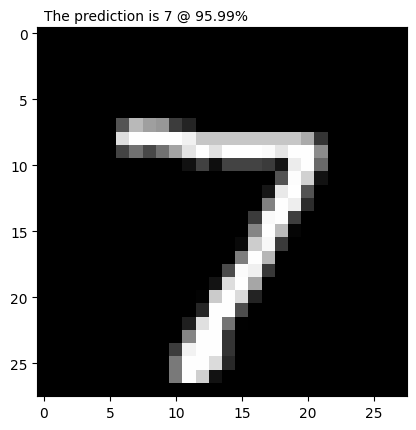

CPU times: user 211 ms, sys: 50.6 ms, total: 261 ms
Wall time: 226 ms


In [ ]:
%%time
import time
import numpy as np
import matplotlib.pyplot as plt


input_list = test_images[:1]

for input_image in input_list:
    # Reshape the input image
    input_image = np.expand_dims(input_image, axis=(0, -1))

    # Run the model inference
    res = compiled_model([input_image])[output_layer]

    input_image = input_image.reshape([28, 28])

    # Display the original image
    plt.figure()
    plt.gray()
    plt.imshow(input_image)

    prediction_text = f"The prediction is {np.argmax(res[0])} @ {max(res[0])*10:.2f}%"
    plt.text(0, -1, prediction_text)

# Show the plots
plt.show()


# **Observation**

- Model memory size reduced and also speedup the model using openvino

# **3. Performance Analysis**

Performance of all the process visualize in the V-Tune

## **Testing the cprofiler**

In [ ]:
%%timeit
print("vk")

Streaming output truncated to the last 5000 lines.
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
vk
v

In [ ]:
import cProfile
import re
cProfile.run('re.compile("foo|bar")')

         216 function calls (209 primitive calls) in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 enum.py:359(__call__)
        2    0.000    0.000    0.000    0.000 enum.py:678(__new__)
        1    0.000    0.000    0.000    0.000 enum.py:986(__and__)
        1    0.000    0.000    0.000    0.000 re.py:249(compile)
        1    0.000    0.000    0.000    0.000 re.py:288(_compile)
        1    0.000    0.000    0.000    0.000 sre_compile.py:265(_compile_charset)
        1    0.000    0.000    0.000    0.000 sre_compile.py:292(_optimize_charset)
        2    0.000    0.000    0.000    0.000 sre_compile.py:477(_get_iscased)
        1    0.000    0.000    0.000    0.000 sre_compile.py:485(_get_literal_prefix)
        1    0.000    0.000    0.000    0.000 sre_compile.py:516(_get_charset_prefix)
        1   

In [ ]:
import tensorflow as tf
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

import tempfile
import zipfile
import os
import cProfile
import pstats
import io

def train_model():
    # Load MNIST dataset
    mnist = tf.keras.datasets.mnist
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

    # Print size of the dataset
    print(f"Training images: {train_images.shape}, Training labels: {train_labels.shape}, Test_images: {test_images.shape}, Test_labels: {test_labels.shape}")
    print("#" * 100)

    # Normalize the input image so that each pixel value is between 0 to 1.
    train_images = train_images / 255.0
    test_images = test_images / 255.0

    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(28, 28)),
        tf.keras.layers.Reshape(target_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(filters=12, kernel_size=(3, 3), activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10)
    ])

    print(model.summary())
    print("#" * 100)

    # Train the digit classification model
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    model.fit(
        train_images,
        train_labels,
        validation_split=0.1,
        epochs=10
    )
    model.save("baseline_model.h5")

if __name__ == "__main__":
    # Create a cProfile object
    profiler = cProfile.Profile()

    # Start profiling
    profiler.enable()

    # Call the function to profile
    train_model()

    # Stop profiling
    profiler.disable()

    # Create a stream to capture the profiling information
    stream = io.StringIO()

    # Create a pstats.Stats object and print the profiling information to the stream
    stats = pstats.Stats(profiler, stream=stream).sort_stats('cumulative')
    stats.print_stats()

    # Print the stream content
    print(stream.getvalue())


11490434/11490434 [==============================] - 0s 0us/step
Training images: (60000, 28, 28), Training labels: (60000,), Test_images: (10000, 28, 28), Test_labels: (10000,)
####################################################################################################
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 12)        120       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 12)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2028)              0         
                                         

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install scalene

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 3.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import pandas as pd
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

import tempfile
import zipfile
import os
import subprocess

def train_model():
    # Load MNIST dataset
    mnist = tf.keras.datasets.mnist
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

    # Print size of the dataset
    print(f"Training images: {train_images.shape}, Training labels: {train_labels.shape}, Test_images: {test_images.shape}, Test_labels: {test_labels.shape}")
    print("#" * 100)

    # Normalize the input image so that each pixel value is between 0 to 1.
    train_images = train_images / 255.0
    test_images = test_images / 255.0

    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(28, 28)),
        tf.keras.layers.Reshape(target_shape=(28, 28, 1)),
        tf.keras.layers.Conv2D(filters=12, kernel_size=(3, 3), activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10)
    ])

    print(model.summary())
    print("#" * 100)

    # Train the digit classification model
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    model.fit(
        train_images,
        train_labels,
        validation_split=0.1,
        epochs=10
    )
    model.save("baseline_model.h5")

if __name__ == "__main__":
    # Use Scalene for profiling
    subprocess.run(["scalene", "--cpu", "--gpu", "--reduced-profile", "--profile-interval", "0.01", "--", "python", "your_script.py"])
